# Outlier Detection & Treatment

[Reference Link](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)

## Content

1. <a href = "#1.-Definition"> Introduction- Outlier</a>
2. <a href = "#2.-Impact-of-an-Outlier">Importance of Outlier Detection</a>
3. <a href = "#3.-Visualizing-the-Data">Plots used for Visualizing Outliers</a>
4. <a href = "#4.-Outlier-Detection-Techniques"> Outlier Detection Techniques</a>
5. <a href = "#5.-Parametric-Method---Univariate">Parametric methods: Univariate</a>
       -Z-Score
       -Inter Quartile Range (IQR)
       -Percentile Capping (Winsorization)
       -Treating Outliers using Trimming
6. <a href = "#6.-Nonparametric-methods:-Univariate">Nonparametric methods: Univariate</a>
       -Isolation Forest
7. <a href = "#7.-Parametric-methods:-Multivariate">Parametric methods: Multivariate</a>
       -Minimum Covariance Determinant (EllipticEnvelope)
8. <a href = "#8.-Non-Parametric---Multivariate">Nonparametric methods: Multivariate</a>
       -DBSCAN
       -LocalOutlierFactor
       
Links:
[Outlier Techniques Link](https://www.kaggle.com/kevinarvai/outlier-detection-practice-uni-multivariate)
[Outlier Treatment](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)
[Visualizing Outlier](https://www.kaggle.com/nareshbhat/outlier-the-silent-killer)

## 1. Definition

An Outlier is that observation which is significantly different from all other observations.
They are extreme values that deviate from other observations on data, they may indicate a variability in a measurement,
experimental errors or a novelty.

#### Causes for Outlier

* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.
* Sampling Error

There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.

Removing outliers from the dataset is often the final treatment but without understanding the cause of error(Natural, Measurement, Seasonal) one should be conscious while doing so(understanding the context of the data).



<a href = "#Content"> Back to menu</a>

## 2. Impact of an Outlier

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:
- It increases the error variance and reduces the power of statistical tests
- If the outliers are non-randomly distributed, they can decrease normality
- They can bias or influence estimates that may be of substantive interest
- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
To understand the impact deeply, let’s take an example to check what happens to a data set with and without outliers in the data set

In [1]:
from IPython.display import Image
#import os
basepath = '../../Images\\'
print('As you can see, data set with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 5.45. But with the outlier, average soars to 30. This would change the estimate completely')
#Image(filename='Outlier.png')
file = "Outlier.png"
path=basepath+file
fp=open(path,'r+')


As you can see, data set with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 5.45. But with the outlier, average soars to 30. This would change the estimate completely


<a href = "#Content"> Back to menu</a>

## 3. Visualizing the Data

Data visualization is useful for data cleaning, exploring data, detecting outliers and unusual groups, identifying trends and clusters etc. Here the list of data visualization plots to spot the outliers.

1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot.

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

#Importing Titanic Dataset
#Download Dataset:    https://www.kaggle.com/hesh97/titanicdataset-traincsv

path = "../../Data\\"
titanic = pd.read_csv(path+'/Titanic_train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic.columns
col = ['Survived', 'Pclass', 'SibSp','Parch', 'Fare']
titanic_data = titanic[col]
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


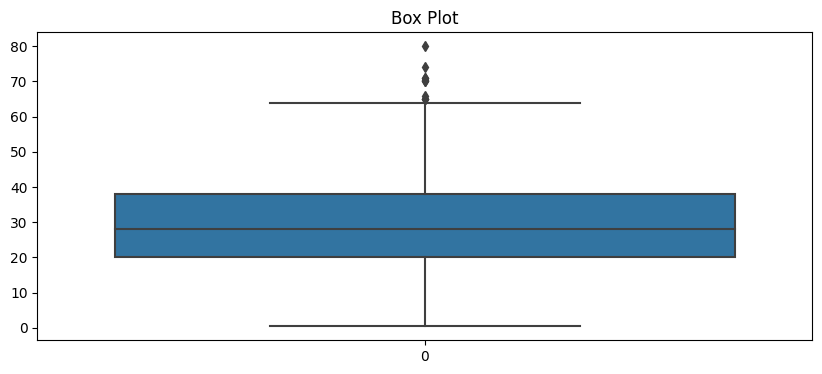

In [4]:
## Box and whisker plot
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
    
Box_plots(titanic['Age'])

**Box Plot Intrepretation**

Value not ranging withing the whisker are categorized as an Outlier. Here, Age Values above 64 are considered as outliers.

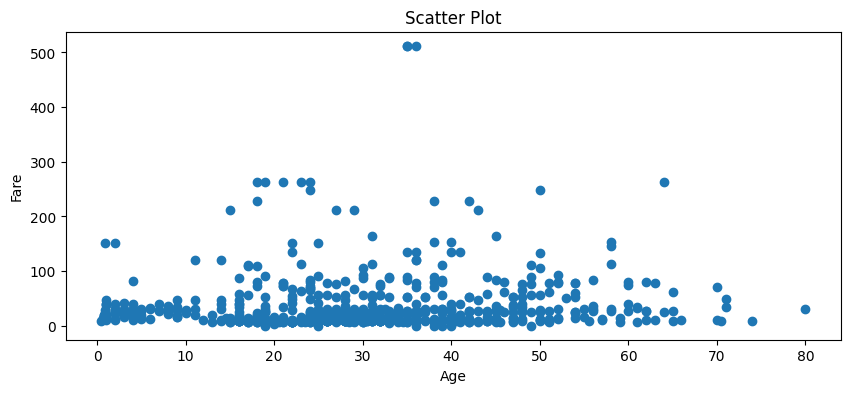

In [5]:
## Scatter Plot  (only for 2 variables)

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()
    
    
scatter_plots(titanic['Age'],titanic['Fare'])

**Scatter Plot**

It shows the distribution of two variables of the dataset, used to check the presence of any outlier. 

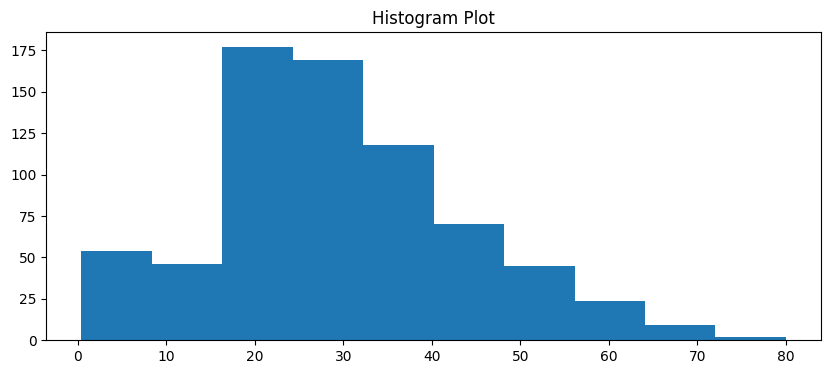

In [6]:
##Histogram

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()

# Note :   Drop NaN before plotting Histogram

hist_plots(titanic['Age'].dropna())

** Q-Q Plot **

The quantile-quantile plot is a graphical method for determining whether two samples of data came from the same population or not. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. 

Only for the reference purpose, a 45% line is also plotted, if the samples are from the same population then the points are along this line.

<Figure size 1000x400 with 0 Axes>

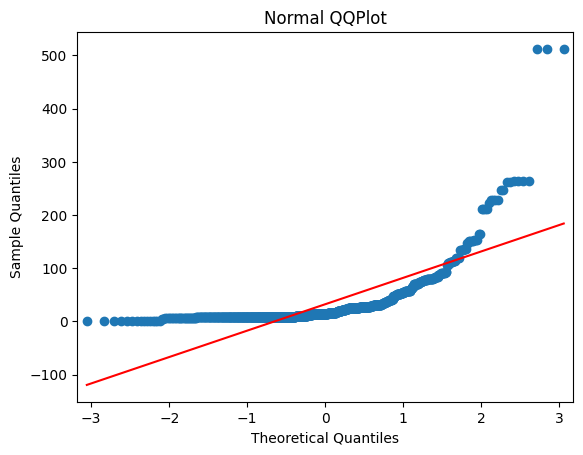

In [7]:
##Normal QQPlot
from statsmodels.graphics.gofplots import qqplot

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
    
qq_plots(titanic['Fare'])

<a href = "#Content"> Back to menu</a>

## 4. Outlier Detection Techniques

##### Types of outliers:
Outlier can be of two types:
1) **Univariate**

    Univariate consists of observations on only a single characteristic or attribute.
    Univariate outliers can be found when we look at distribution of a single variable.
    
2) **Multivariate**

     Multivariate outliers can be found in a n-dimensional space (of n-features). Looking at distributions in n-dimensional spaces can be very difficult for the human brain, that is why we need to train a model to do it for us.




## 5. Parametric Method - Univariate

#### Z- Score
Using Z score method,we can find out how many standard deviations value away from the mean.
Figure in the left shows area under normal curve and how much area that standard deviation covers.
* 68% of the data points lie between + or - 1 standard deviation.
* 95% of the data points lie between + or - 2 standard deviation
* 99.7% of the data points lie between + or - 3 standard deviation

Outlier Condition:
If the Score is more than 3*Standard Deviation (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. 
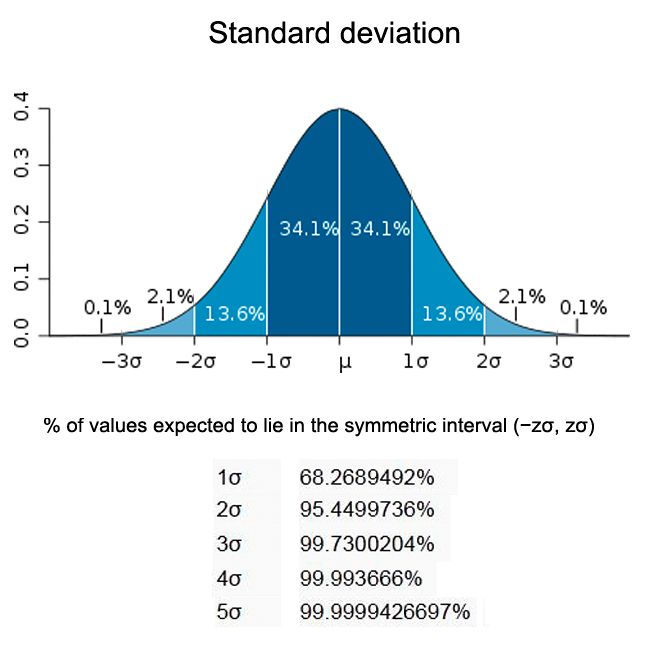

##### Z-Score pros:
* It is a very effective method if you can describe the values in the feature space with a gaussian distribution. (Parametric)
* The implementation is very easy using pandas and scipy.stats libraries.
    
##### Z-Score cons:
* It is only convenient to use in a low dimensional feature space, in a small to medium sized dataset.
* Is not recommended when distributions can not be assumed to be parametric.

In [8]:
import pandas as pd
import numpy as np

#Dataset Used:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv
house_price = pd.read_csv(path+'/House_Price_Auto Regression_train.csv')

out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    
#Passing a single column named 'LotArea' from the df
Zscore_outlier(house_price['LotArea'])

Outliers: [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200]


In [9]:
house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### Inter-quartile Range(IQR)
IQR tells us the variation in the data set.
* Q1 represents the 1st quartile/25th percentile of the data.
* Q2 represents the 2nd quartile/median/50th percentile of the data.
* Q3 represents the 3rd quartile/75th percentile of the data.
* (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represnt the largest value in the data set.
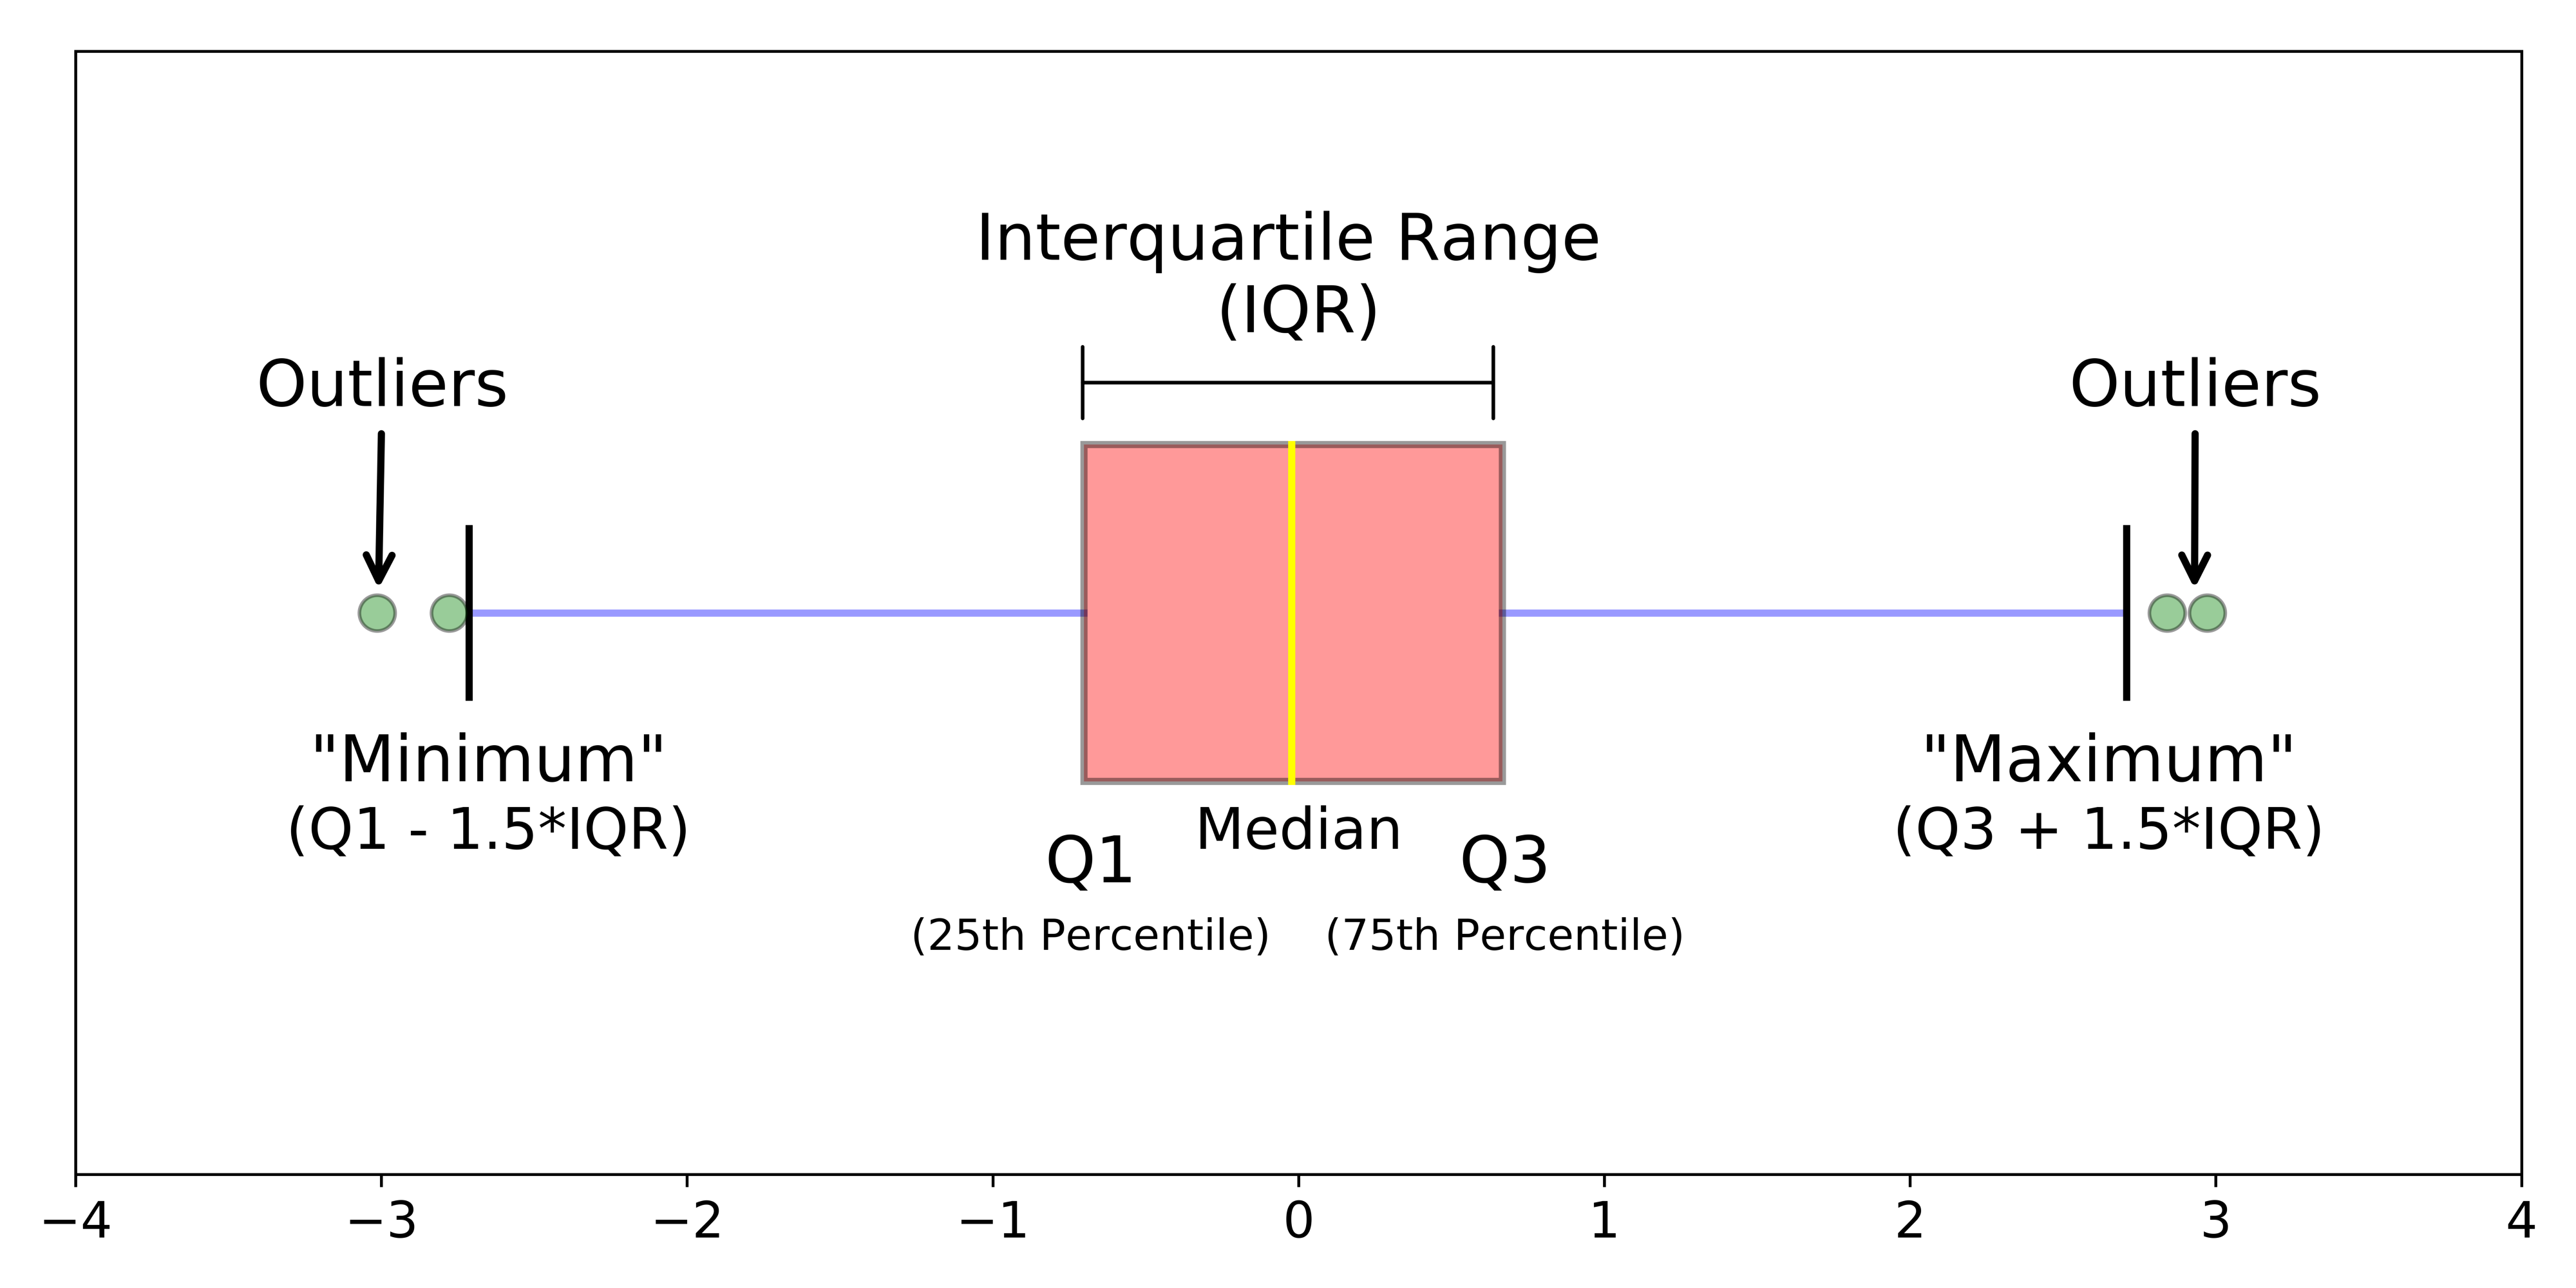

**Outlier Condition:  Value beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers**

In [10]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
    
iqr_outliers(house_price['LotArea'])

Outliers: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]


#### PERCENTILE CAPPING (WINSORIZATION METHOD)

This method is similar to IQR method. If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.

**Outlier Condition:   1st Quartile  > Value > 99th Quartile**

In [11]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)

Winsorization_outliers(titanic['Fare'])

Outliers: [263.0, 263.0, 512.3292, 262.375, 263.0, 263.0, 512.3292, 512.3292, 262.375]


#### Outlier Treatment 
##### Trimming

In [12]:
data = titanic['Fare']
upper_limit = np.percentile(data , 99) 
lower_limit = np.percentile(data , 1)

#Clean_df is the dataframe after removing Outliers
clean_df = titanic[(titanic['Fare'] < upper_limit) & (titanic['Fare'] > lower_limit)]

print("Shape of Dataset before removing outliers",titanic.shape)
print("\nShape of Dataset after removing outliers",clean_df.shape)

Shape of Dataset before removing outliers (891, 12)

Shape of Dataset after removing outliers (867, 12)


<a href = "#Content"> Back to menu</a>

## 6. Nonparametric methods: Univariate

#### Isolation Method
It is an clustering algorithm that belongs to the ensemble decision trees family and is similar in principle to Random Forest.
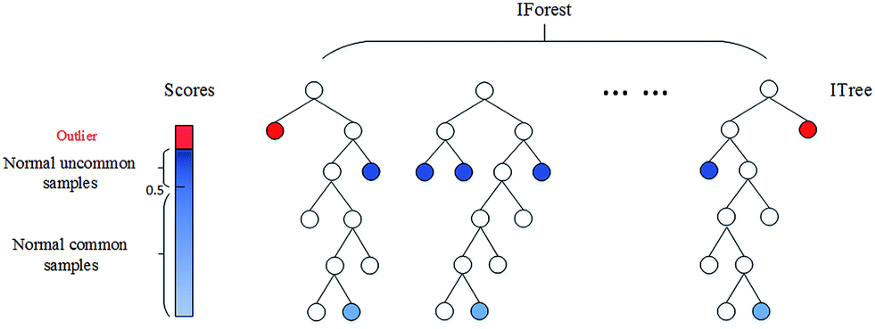

**Explanation:**

Isolation forest’s basic principle is that outliers are few and far from the rest of the observations. To build a tree (training), the algorithm randomly picks a feature from the feature space and a random split value ranging between the maximums and minimums. This is made for all the observations in the training set. To build the forest a tree ensemble is made averaging all the trees in the forest.

Then for prediction, it compares an observation against that splitting value in a “node”, that node will have two node children on which another random comparisons will be made. The number of “splittings” made by the algorithm for an instance is named: “path length”. As expected, outliers will have shorter path lengths than the rest of the observations.

**Notes:**
1. It classify the data point to outlier and not outliers and works great with very high dimensional data.
2. It works based on decision tree and it isolate the outliers.
3. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier.

#### Isolation Forest Pros:

* There is no need of scaling the values in the feature space.
* It is an effective method when value distributions can not be assumed.
* It has few parameters, this makes this method fairly robust and easy to optimize.
* Scikit-Learn’s implementation is easy to use and the documentation is superb.

#### Isolation Forest Cons:

* The Python implementation exists only in the development version of Sklearn.
* Visualizing results is complicated.
* If not correctly optimized, training time can be very long and computationally expensive.

In [13]:
#Isolation Tree code

from sklearn.ensemble import IsolationForest

def IsolationOutliers(df):
    
    # identify outliers in the training dataset
    clf = IsolationForest(max_samples = 100, random_state = 42)
    clf.fit(df)
    
    y_noano = clf.predict(df)
    y_noano = pd.DataFrame(y_noano, columns = ['Top'])
    
    #Remove outliers where 1 represent inliers and -1 represent outliers:
    y_noano[y_noano['Top'] == 1].index.values
    clean_df = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
    clean_df.reset_index(drop = True, inplace = True)
    
    print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
    print("Number of rows without outliers:", clean_df.shape[0])
    
    #To view all the outliers where value =-1
    outlier_df = df.iloc[y_noano[y_noano['Top'] == -1].index.values]
    print(outlier_df)
    
    return clean_df, outlier_df

"""
-- About Function: This function takes complete Training dataframe(All numerical columns), to identify outlier rows from df.
-- Input Arguments:   Training dataframe (all columns should be numerical)
-- Output Arguments:  Returns 2 df. i.e. Clean dataframe & Outlier dataframe

-- IMP NOTE: Single column can't be used as an input of this model
"""   

clean_df, outlier_df = IsolationOutliers(house_price[['LotArea', 'SalePrice']])    


Number of Outliers: 290
Number of rows without outliers: 1170
      LotArea  SalePrice
11      11924     345000
20      14215     325300
29       6324      68500
30       8500      40000
34       7313     277500
...       ...        ...
1434    17400     160000
1437    12444     394617
1446    26142     157900
1449     1533      92000
1453    17217      84500

[290 rows x 2 columns]


## 7. Parametric methods: Multivariate

#### EllipticEnvelope 

In [14]:
from sklearn.covariance import EllipticEnvelope

def EllipticOutliers(df):
    
    # identify outliers in the training dataset
    ee = EllipticEnvelope()
    ee.fit(df)
    
    y_noano = ee.predict(df)
    y_noano = pd.DataFrame(y_noano, columns = ['Top'])
    
    #Remove outliers where 1 represent inliers and -1 represent outliers:
    ## select all rows that are not outliers
    y_noano[y_noano['Top'] == 1].index.values
    clean_df = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
    clean_df.reset_index(drop = True, inplace = True)
    
    print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
    print("Number of rows without outliers:", clean_df.shape[0])
    
    #To view all the outliers where value =-1
    outlier_df = df.iloc[y_noano[y_noano['Top'] == -1].index.values]
    print(outlier_df)
    
    return clean_df, outlier_df

"""
-- About Function: This function takes complete Training dataframe(All numerical columns), to identify outlier rows from df.
-- Input Arguments:   Training dataframe (all columns should be numerical)
-- Output Arguments:  Returns 2 df. i.e. Clean dataframe & Outlier dataframe
"""   

clean_ee_df, outlier_ee_df = EllipticOutliers(house_price[['LotArea', 'SalePrice']])    


Number of Outliers: 146
Number of rows without outliers: 1314
      LotArea  SalePrice
11      11924     345000
20      14215     325300
45       7658     319900
53      50271     385000
58      13682     438780
...       ...        ...
1423    19690     274970
1430    21930     192140
1437    12444     394617
1446    26142     157900
1453    17217      84500

[146 rows x 2 columns]


<a href = "#Content"> Back to menu</a>

## 8. Non Parametric - Multivariate

#### DBSCAN Method (Density-Based Spatial Clustering of Applications with Noise)

This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance.

DBSCAN is a density based clustering algorithm that divides a dataset into subgroups of high density regions and identifies high density regions cluster as outliers. Here cluster -1 indicates that the cluster contains outlier and rest of clusters have no outliers.There are two parameters required for DBSCAN. DBSCAN give best result for multivariate outlier detection.

1. epsilon: a distance parameter that defines the radius to search for nearby neighbors.
2. minimum amount of points required to form a cluster.
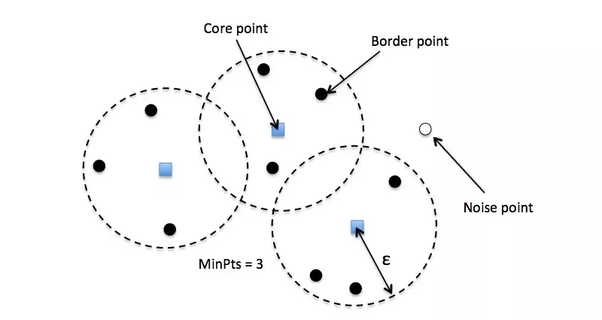
Using epsilon and minPts, we can classify each data point as:
* Core point –> a point that has at least a minimum number of other points (minPts) within its radius.
* Border point –> a point is within the radius of a core point but has less than the minimum number of other points (minPts) within its own radius.
* Noise point –> a point that is neither a core point or a border point


#### Dbscan pros:
* It is a super effective method when the distribution of values in the feature space can not be assumed.
* Works well if the feature space for searching outliers is multidimensional (ie. 3 or more dimensions)
* Sci-kit learn’s implementation is easy to use and the documentation is superb.
* Visualizing the results is easy and the method itself is very intuitive.

#### Dbscan cons:
* The values in the feature space need to be scaled accordingly.
* Selecting the optimal parameters eps, MinPts and metric can be difficult since it is very sensitive to any of the three params.
* It is an unsupervised model and needs to be re-calibrated each time a new batch of data is analyzed.
* It can predict once calibrated but is strongly not recommended.

In [15]:
#DBSCAN Outlier detection

import pandas as pd
from sklearn.cluster import DBSCAN
train = titanic.copy()
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))
    
DB_outliers(train['Fare'])

 0     705
 2      50
 4      36
-1      32
 6      15
 1      12
 7       8
 5       7
 8       7
 9       7
 3       6
 10      6
Name: cluster, dtype: int64


#### Local Outlier Factor Method(LOF):

[LOF Documentation](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)

LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF value for an observation, the more anomalous the observation.
This is useful because not all methods will not identify a point that’s an outlier relative to a nearby cluster of points (a local outlier) if that whole region is not an outlying region in the global space of data points.
A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors.
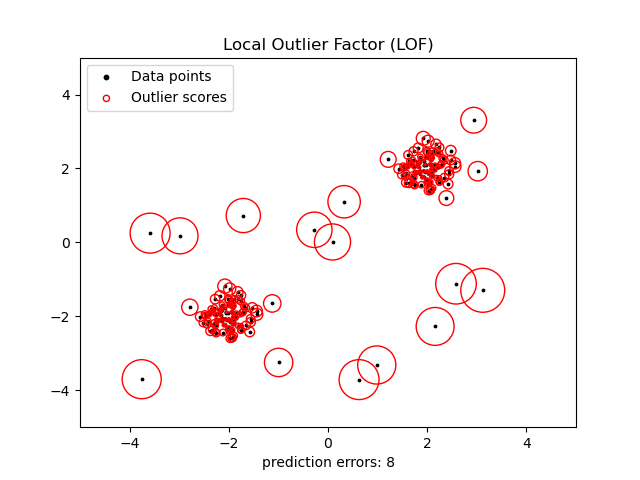


#### Note
LOF Method can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality.

In [16]:
def LOFOutliers(df):
    
    # fit the model for outlier detection (default)
    #clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1,novelty=True)
    # use fit_predict to compute the predicted labels of the training samples
    # (when LOF is used for outlier detection, the estimator has no predict,
    # decision_function and score_samples methods).
    y_pred1 = clf.fit(df)
    y_noano = clf._predict(df)
    y_noano = pd.DataFrame(y_noano, columns = ['Top'])
    
    #Remove outliers where 1 represent inliers and -1 represent outliers:
    ## select all rows that are not outliers
    y_noano[y_noano['Top'] == 1].index.values
    clean_df = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
    clean_df.reset_index(drop = True, inplace = True)
    
    print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
    print("Number of rows without outliers:", clean_df.shape[0])
    
    #To view all the outliers where value =-1
    outlier_df = df.iloc[y_noano[y_noano['Top'] == -1].index.values]
    print(outlier_df)
    
    return clean_df, outlier_df

"""
-- About Function: This function takes complete Training dataframe(All numerical columns), to identify outlier rows from df.
-- Input Arguments:   Training dataframe (all columns should be numerical)
-- Output Arguments:  Returns 2 df. i.e. Clean dataframe & Outlier dataframe
"""   

clean_lof_df, outlier_lof_df = LOFOutliers(titanic_data)


Number of Outliers: 73
Number of rows without outliers: 818
     Survived  Pclass  SibSp  Parch    Fare
0           0       3      1      0  7.2500
14          0       3      0      0  7.8542
19          1       3      0      0  7.2250
36          1       3      0      0  7.2292
67          0       3      0      0  8.1583
..        ...     ...    ...    ...     ...
834         0       3      0      0  8.3000
840         0       3      0      0  7.9250
845         0       3      0      0  7.5500
872         0       1      0      0  5.0000
875         1       3      0      0  7.2250

[73 rows x 5 columns]


c:\program files\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


<a href = "#Content"> Back to menu</a>

In [17]:
#Summary / Conclusion ---------PENDING
#Cook Distance 

In [18]:
#tested.. NO errors